In [51]:
import cv2
import numpy
import matplotlib.pyplot as plt
from numpy import uint8, ones, array, fft, log, abs, zeros, int0
from os import listdir
from os.path import isfile, join
path = '../DATA/ALL/'
files = [path+f for f in listdir(path) if isfile(join(path, f))]
cv2.__version__
len(files)

200

### Load and display image

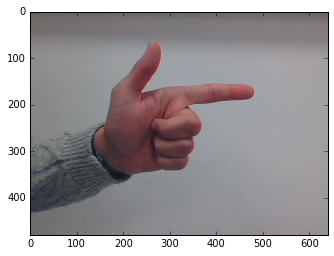

480 640


In [16]:
img_bgr = cv2.imread(files[75])
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
h,w =img_bgr.shape[:2]
print(h,w)

### Find the correct range of colors and retrieve hand

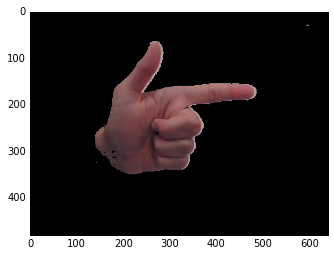

In [17]:

seuil=15
for i in range(len(img_rgb)):
    for j in range(len(img_rgb[i])):
        r = img_rgb[i][j][0]
        g = img_rgb[i][j][1]
        b = img_rgb[i][j][2]
        if (max(r,g,b)- min(r,g,b) < seuil) or (max(r,g,b)!=r):
            img_rgb[i][j]=[0,0,0]

plt.imshow(img_rgb)
plt.show()


### Filter and binarize the image 

In [18]:
img_filtered = cv2.medianBlur(img_rgb, 5) ## Median blur to 

gray = cv2.cvtColor(img_filtered,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0) # Gaussian blur to 

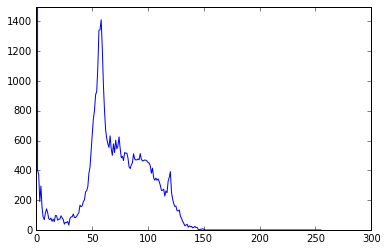

In [19]:
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
plt.plot(hist)
plt.ylim(1, 1500)
plt.show()

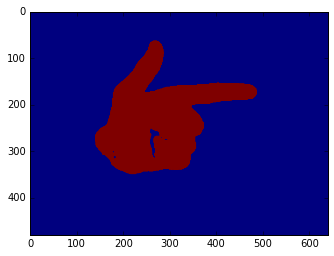

In [20]:
_,thresh2 = cv2.threshold(blur,20,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh2)
plt.show()


### Find the correct contour of the image

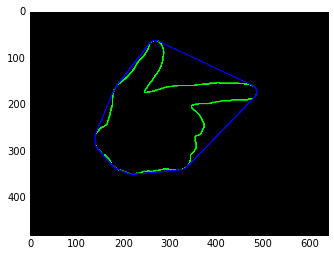

In [21]:
_, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE ,cv2.CHAIN_APPROX_SIMPLE)
max_area = 0
max_perimeter = 0
ci = None
for i in range(len(contours)):
    cnt=contours[i]
    area = cv2.contourArea(cnt)
    if(area>max_area):
        max_area=area
        max_perimeter = cv2.arcLength(cnt,True)
        ci=i
cnt=contours[ci]
hull = cv2.convexHull(cnt)                                    
drawing = zeros(img_bgr.shape,uint8)
cv2.drawContours(drawing,[cnt],0,(0,255,0),2)
cv2.drawContours(drawing,[hull],0,(0,0,255),2)
plt.imshow(drawing)
plt.show()

In [23]:
#Poing fermé
print('perimeter  : {0} '.format(max_perimeter))
print('area : {0} '.format(max_area))
print('perimeter / area : {0} '.format(max_perimeter/max_area))

perimeter  : 995.0163683891296 
area : 56897.5 
perimeter / area : 0.017487875010134536 


In [28]:
#Main ouverte
print('perimeter  : {0} '.format(max_perimeter))
print('area : {0} '.format(max_area))
print('perimeter / area : {0} '.format(max_perimeter/max_area))

perimeter  : 2060.701782822609 
area : 57927.5 
perimeter / area : 0.0355738083435779 


In [38]:
#flèche vers la droite 
print('perimeter  : {0} '.format(max_perimeter))
print('area : {0} '.format(max_area))
print('perimeter / area : {0} '.format(max_perimeter/max_area))

perimeter  : 1240.187945008278 
area : 43697.5 
perimeter / area : 0.028381210481338244 


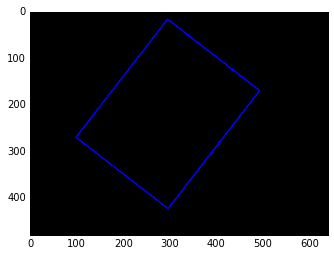

In [39]:
# Utilité ? 
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = int0(box)
rectangle = zeros(img_bgr.shape,uint8)
cv2.drawContours(rectangle,[box],0,(0,0,255),2)
plt.imshow(rectangle)
plt.show()